## **Data Scientist Nanodegree - Udacity - Project 1 - Data Science Blog**

## CRISP-DM Process

Using the CRISP-DM (Cross-Industry Standard Process for Data Mining) process, we take a look at the following:

**Business Understanding**:
As we dive into the 2019 Stack Overflow Survey Data. It is important to state the three questions that we are going to be prividing answers to. To buttress home our analysis, we would be using visualizations to showcase our findings. Let's go!

The data used in this project can be accessed here - [Stack Overflow Annual Developer Survey Data](https://insights.stackoverflow.com/survey)



---



**The Questions Explored**
+ From the data, which country has the highest job satisfaction for developers?
+ With respect to job satisfaction, is there any difference between developers with IT-related undergraduate major and those with such?
+ On salary, are developers who claim to contribute to open source paid better than those that are not?

## Loading and preparation of the data 

In order to answer the questions, these are the things we did in this data preparation step:

+ Filtered the data so it only contains the developer responses.
+ Because JobSat column is a categorical data, we are going to fill the N/A values with the mode.
+ We have the differences in salary range (that really depends on which country the developers live in), so we are going to fill the N/A values in ConvertedComp with the average salary of the developer's Country. Then we drop the remaining N/A values (19 rows), it happens because there are countries with average ConvertedComp = NaN (all of the respondents from that country didn't fill the salary form).
+ Set the JobSat and OpenSourcer column into categorical data type.



In [0]:
# Import all the libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Fetch the data
survey_data = "/content/survey_results_public.csv"
data = pd.read_csv(survey_data)

# Get a sense of the data loaded
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

In [10]:
# Get the names of all the columns in the dataset
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [14]:
# For the MainBranch column, explore and view all the responses  
data['MainBranch'].unique()

array(['I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [15]:
# Count the number of responses provided by all who attempted the survey 
data['MainBranch'].value_counts()

I am a developer by profession                                                   35811
I am a student who is learning to code                                            5581
I am not primarily a developer, but I write code sometimes as part of my work     4115
I code primarily as a hobby                                                       1844
I used to be a developer by profession, but no longer am                           868
Name: MainBranch, dtype: int64

Evidently, we see that the "I am a developer by profession" response is the highest. And with this, we may further drill down on the category os survey repondednts.

In [13]:
#Filter to focus only on developers who took the survey
dev_data = data[data['MainBranch'] == 'I am a developer by profession']
dev_data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"10,000 or more employees","Academic researcher;Developer, desktop or ente...",16,14,9,Very dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,No,I am not interested in new job opportunities,Less than a year ago,"Write any code;Write code by hand (e.g., on a ...",No,"Industry that I'd be working in;Languages, fra...",I was preparing for a job search,UAH,Ukrainian hryvnia,NaN,NaN,NaN,55.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,A few days each month,Office,A little above average,"Yes, because I see value in code review",NaN,...,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,Django;Express;Flask;jQuery;React.js;Spring,Flask;jQuery;React.js;Spring,Cordova;Node.js,Apache Spark;Hadoop;Node.js;React Native,IntelliJ;Notepad++;Vim,Linux-based,"Outside of work, for personal projects",Not at all,NaN,Yes,Also Yes,Yes,Facebook,In real life (in person),Username,I don't remember,Multiple times per day,Find answers to specific questions,More than 10 times per week,Stack Overflow was much faster,NaN,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am no

In [55]:
# Let us get a sense of how much is missing in the Column - 'JobSat'
data['JobSat'].isnull().sum()

9525

We have about 9525 missing data in the JobSat column.

In [0]:
#Use the mode to fill in any missing data in the column 'JobSat'
dev_data['JobSat'] = dev_data['JobSat'].fillna(dev_data['JobSat'].mode()[0])

In [0]:
#Use the mean of each country to fill in the missing data in the column 'ConvertedComp'
sal_per_country = dev_data.groupby('Country')['ConvertedComp'].mean()
dev_data['ConvertedComp'] = dev_data.apply(lambda x: sal_per_country[x['Country']] if pd.isnull(x['ConvertedComp']) else x['ConvertedComp'], axis=1)
dev_data = dev_data.dropna(subset=['ConvertedComp'])

In [0]:
# Here, we would simply simply set the JobSat and OpenSourcerr column into categorical data type so it will be sorted with the right order (ordinal data)
dev_data['JobSat'] = pd.Categorical(dev_data['JobSat'], categories=['Very dissatisfied',
                                                                                'Slightly dissatisfied',
                                                                                'Neither satisfied nor dissatisfied',
                                                                                'Slightly satisfied',
                                                                                'Very satisfied'], ordered=True)

dev_data['OpenSourcer'] = pd.Categorical(dev_data['OpenSourcer'], categories=['Never',
                                                                                'Less than once per year',
                                                                                'Less than once a month but more than once per year',
                                                                                'Once a month or more often'], ordered=True)

## **Exploring our data**

In [0]:
# Filtering the data to only show the survey result from the top 30 country based on the all the respondents
top_30_country = list(dev_data['Country'].value_counts().head(30).index)
filtered_dev_data = dev_data[dev_data['Country'].isin(top_30_country)]

In [0]:
# Prepare the data for visualization by aggregation
aggregated_data = filtered_dev_data.groupby(['Country','JobSat'], as_index=False)['Respondent'].count()

In [0]:
# We then add a new column - percentage
total_respondents_per_country = filtered_dev_data['Country'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_country[x['Country']], axis=1) \
                                           .round(3)

In [0]:
# Pivot the data
aggregated_data = aggregated_data[['Country', 'JobSat', 'Respondent Percentage']]
pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='JobSat') \
                 .sort_values('Very satisfied', ascending=False)

Since we have respondents from about 170 countries, we would only narrow down to the top 30 to get a good sense of all responses.

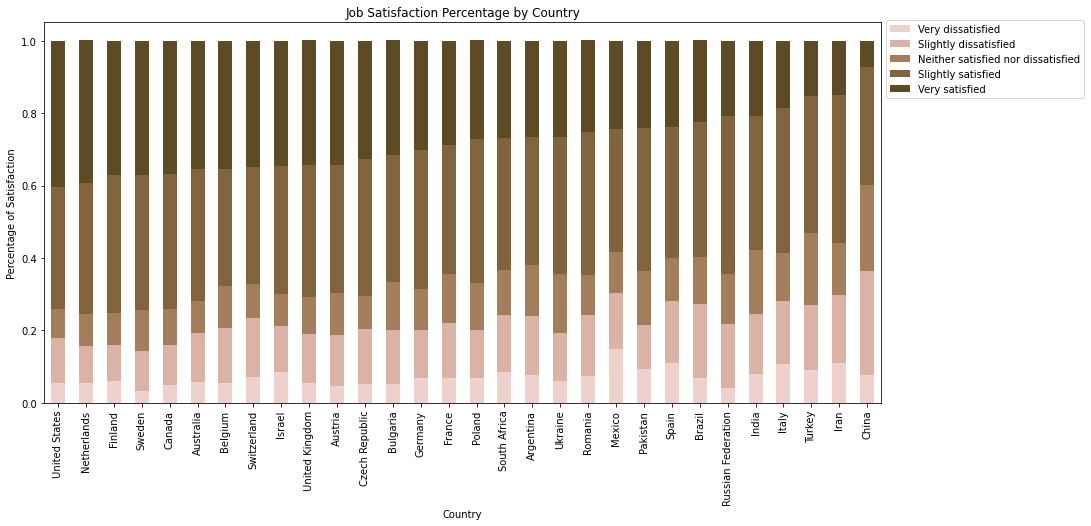

In [67]:
# Visualize the data
pivoted_data.plot(kind='bar', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("ch:4.5,-.2,dark=.3")),
                  figsize=(15,7))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('Percentage of Satisfaction')
plt.title('Job Satisfaction Percentage by Country')
plt.show()

Clearly, we see that the United States comes top as the best country with respect to job satisfaction. 40% of developers here claim to be very satisfied, followed by the Netherlands and other European countries coming top. Interesingly, all the top 5 countries with the highest job satisfaction are from Europe.


**Exploring developers with Undergraduate major and those who don't have vis-a-vis job satisfaction**

In [32]:
# Create a new columns to flag each respondent if their major is related or not
def check_major(value):
    '''
    input: the value of each row in the selected column
    output: the mapped value based on the rule we made in this function
    '''

    if value == 'Computer science, computer engineering, or software engineering' \
    or value == 'Information systems, information technology, or system administration' \
    or value == 'Web development or web design':
        return 'IT Related'
    return 'Not IT Related'

dev_data['Major'] = dev_data['UndergradMajor'].apply(check_major)

dev_data['Major'].value_counts(normalize=True)

IT Related        0.705851
Not IT Related    0.294149
Name: Major, dtype: float64

In order to answer this question, we need to cateogrize the UndergradMajor column into two types (IT Related and Not IT Related) first. It shows that 29% of developers do not have IT-related background (their undergraduate major).

In [0]:
# Aggregate the data so we know how many respondents in each major (IT related or not IT related)
aggregated_data = dev_data.groupby(['Major','JobSat'], as_index=False)['Respondent'].count()

# Add column percentage
total_respondents_per_major = dev_data['Major'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_major[x['Major']], axis=1) \
                                           .round(4)

# Pivot the data
aggregated_data = aggregated_data[['Major', 'JobSat', 'Respondent Percentage']]
pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Major', columns='JobSat')


Then we calculate the percentages of each value in JobSat to measure the job satisfaction for each major type.

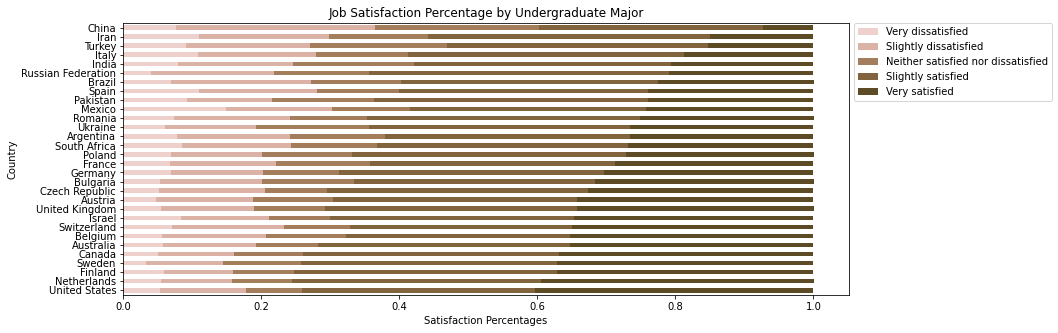

In [71]:
pivoted_data.plot(kind='barh', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("ch:4.5,-.2,dark=.3")),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.xlabel('Percentage of Satisfaction')
plt.title('Job Satisfaction Percentage by Undergraduate Major')
plt.show()

In [35]:
pivoted_data

JobSat,Very dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Very satisfied
Major,,,,,
IT Related,0.0658,0.1477,0.1241,0.3674,0.2950
Not IT Related,0.0681,0.1330,0.1033,0.3599,0.3357



It is clear from the visualization and table above that developers whose undergraduate major is not IT-related have slightly better job satisfaction compared those who have IT related background as abour 34% and 30% respondents feel very satisfied respectively.


**How Compensation relates to contributing to open source**

In [37]:
# Aggregate the data
comp_per_category = dev_data.groupby('OpenSourcer', as_index=False)['ConvertedComp'].mean()

comp_per_category

,OpenSourcer,ConvertedComp
0,Never,117604.226871
1,Less than once per year,119056.791762
2,Less than once a month but more than once per ...,123562.345506
3,Once a month or more often,124584.656678


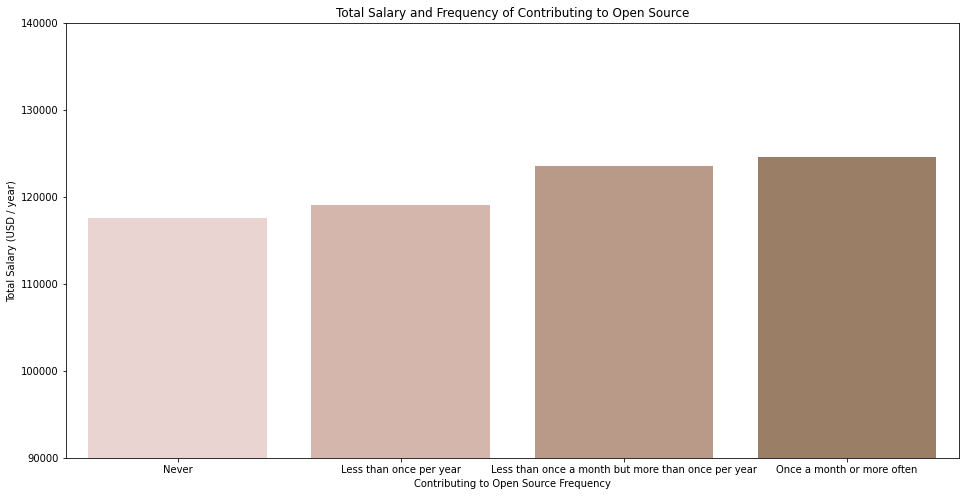

In [72]:
plt.figure(figsize=(16, 8))
sns.barplot(data=comp_per_category, x='OpenSourcer', y='ConvertedComp', palette=sns.color_palette("ch:4.5,-.2,dark=.3"))
plt.ylim(90000,140000)
plt.title('Total Salary and Frequency of Contributing to Open Source')
plt.ylabel('Total Salary (USD / year)')
plt.xlabel('Contributing to Open Source Frequency')
plt.show()

From the forgoing, **developers who contibute frequently to open source claim to have higher salary.** And those who don't contribute to open source regularly have abut 7% higher salary than those who never contribute at all.

We also see that the correlation between those two variables does not mean if we want the higher salary, we have to start contributing to open source. We need to remember one thing, correlation does not imply causation. One thing that seems reasonable about those correlation are, you need to have some sort of skills if you want to contribute to open source (I did not mean that a newbie in programming could not contribute but we can agree that the more experienced developers must be better at doing that), thus make you a more skilled and better developers, and the more skilled someone, the higher their salary.



### **Conclusion**


In summary, we can draw the following conclusions from our analysis:

+ The United States has the highest job satisfaction level in the world, and 5 of top 10 countries with the highest job satisfaction level are located in Europe.
+ Developers whose undergraduate major is not IT-related have slightly better job satisfaction.
+ Developers who contribute more to the open source have the higher salary.